In [1]:
import pandas as pd

path = r"Coin Metrics/coinmetrics_btc.csv"   # 或 r"Coin Metrics/coinmetrics_btc.csv"
df = pd.read_csv(path)

print(df.shape)
print(df.columns.tolist())
print(df.head(5))
print(df.tail(5))
print(df.info())
print(df.isna().sum().sort_values(ascending=False).head(20))


(6221, 32)
['time', 'AdrActCnt', 'AdrBalCnt', 'AssetCompletionTime', 'AssetEODCompletionTime', 'BlkCnt', 'CapMVRVCur', 'CapMrktCurUSD', 'CapMrktEstUSD', 'FeeTotNtv', 'FlowInExNtv', 'FlowInExUSD', 'FlowOutExNtv', 'FlowOutExUSD', 'HashRate', 'IssTotNtv', 'IssTotUSD', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'ReferenceRate', 'ReferenceRateETH', 'ReferenceRateEUR', 'ReferenceRateUSD', 'SplyCur', 'SplyExNtv', 'SplyExUSD', 'SplyExpFut10yr', 'TxCnt', 'TxTfrCnt', 'volume_reported_spot_usd_1d']
         time  AdrActCnt  AdrBalCnt  AssetCompletionTime  \
0  2009-01-03        0.0        0.0         1.614335e+09   
1  2009-01-04        0.0        0.0         1.614335e+09   
2  2009-01-05        0.0        0.0         1.614335e+09   
3  2009-01-06        0.0        0.0         1.614335e+09   
4  2009-01-07        0.0        0.0         1.614335e+09   

   AssetEODCompletionTime  BlkCnt  CapMVRVCur  CapMrktCurUSD  CapMrktEstUSD  \
0            1.614335e+09     0.0         NaN            NaN      

In [2]:
from p import *

loading...


In [3]:
lg = np.log(df['PriceUSD'])

In [4]:
lg.index = df['time']
lg.index = pd.to_datetime(lg.index, errors="coerce")
lg = lg.sort_index()

In [5]:
lg

time
2009-01-03          NaN
2009-01-04          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
                ...    
2026-01-10    11.412067
2026-01-11    11.415502
2026-01-12    11.420165
2026-01-13    11.464832
2026-01-14          NaN
Name: PriceUSD, Length: 6221, dtype: float64

In [6]:
lg.shift(3)

time
2009-01-03          NaN
2009-01-04          NaN
2009-01-05          NaN
2009-01-06          NaN
2009-01-07          NaN
                ...    
2026-01-10    11.420908
2026-01-11    11.419679
2026-01-12    11.413543
2026-01-13    11.412067
2026-01-14    11.415502
Name: PriceUSD, Length: 6221, dtype: float64

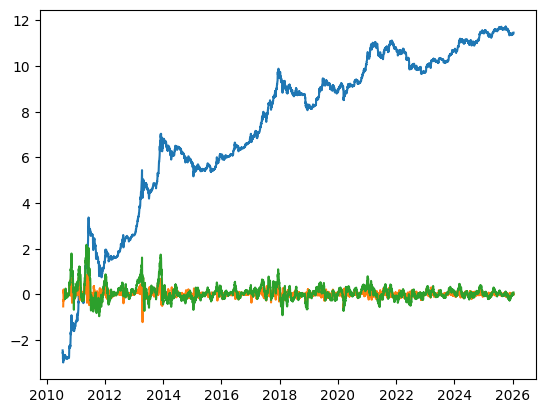

In [7]:
plt.plot(lg)
plt.plot(lg-lg.shift(7))
plt.plot(lg-lg.shift(30))

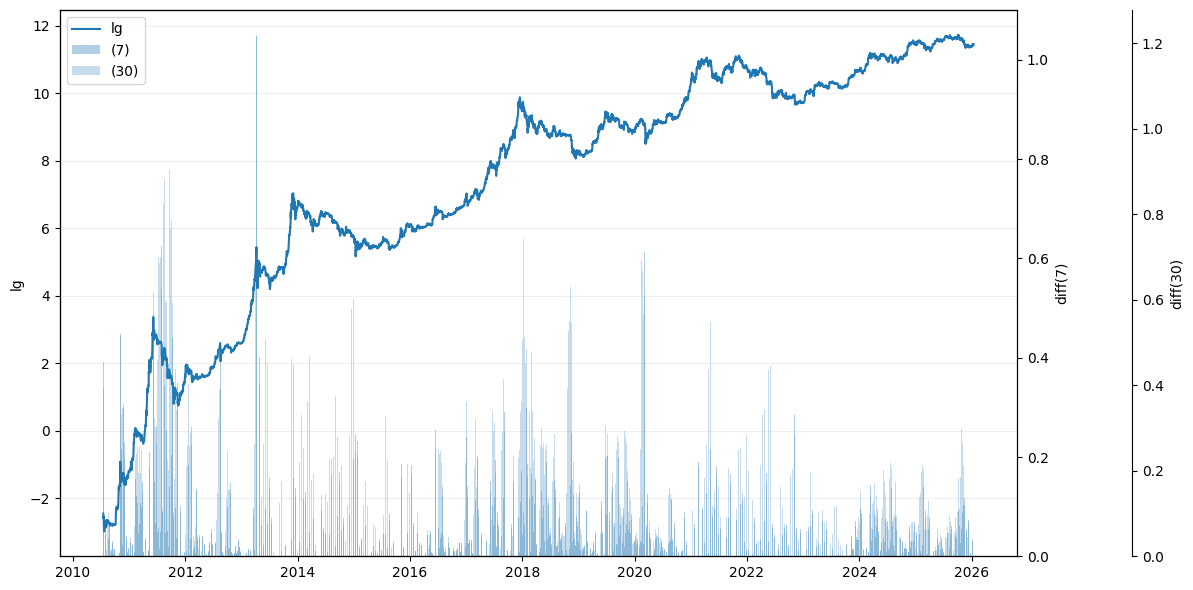

In [8]:

fmin7 = lg.iloc[::-1].rolling(7, min_periods=1).min().iloc[::-1]
fmin30 = lg.iloc[::-1].rolling(30, min_periods=1).min().iloc[::-1]

s0 = lg
s7 = lg - fmin7
s30 = lg - fmin30

x = s0.index

fig, ax1 = plt.subplots(figsize=(12, 6))

l1, = ax1.plot(x, s0, label="lg")
ax1.set_ylabel("lg")

ax2 = ax1.twinx()
b2 = ax2.bar(x, s7, alpha=0.35, label="(7)")
ax2.set_ylabel("diff(7)")

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.12))
ax3.spines["right"].set_visible(True)
b3 = ax3.bar(x, s30, alpha=0.25, label="(30)")
ax3.set_ylabel("diff(30)")

handles = [l1, b2, b3]
labels = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc="upper left")

ax1.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

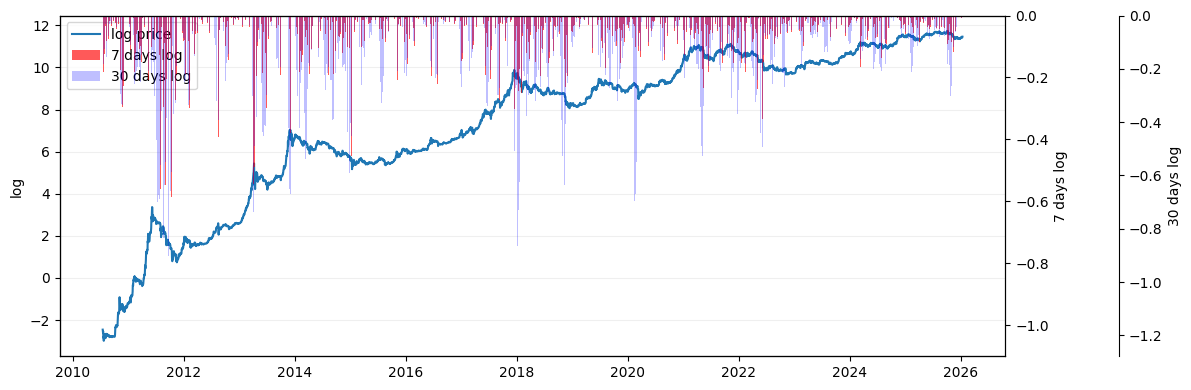

In [13]:

x = s0.index

fig, ax1 = plt.subplots(figsize=(12, 4))

l1, = ax1.plot(x, s0, label="log price")
ax1.set_ylabel("log")

ax2 = ax1.twinx()
b2 = ax2.bar(x, -s7, alpha=0.65, label="7 days log", color='red')
ax2.set_ylabel("7 days log")

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.12))
ax3.spines["right"].set_visible(True)
b3 = ax3.bar(x, -s30, alpha=0.25, label="30 days log", color='blue')
ax3.set_ylabel("30 days log")

handles = [l1, b2, b3]
labels = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc="upper left")

ax1.grid(True, axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

In [9]:
df = pd.read_parquet("Polymarket/finance_politics_odds_history.parquet", engine="pyarrow")
df

,market_id,token_id,timestamp,price
0,255140,4743579536152330606866939019100172195245171947...,1970-01-20 21:10:04.802,0.0550
1,255140,4743579536152330606866939019100172195245171947...,1970-01-20 21:11:31.203,0.0550
2,255140,4743579536152330606866939019100172195245171947...,1970-01-20 21:12:57.604,0.0550
3,255140,4743579536152330606866939019100172195245171947...,1970-01-20 21:14:24.002,0.0550
4,255140,4743579536152330606866939019100172195245171947...,1970-01-20 21:15:50.403,0.0550
...,...,...,...,...
2143176,897329,1441341842174471672181235644969822857103541674...,1970-01-21 10:55:12.022,0.9595
2143177,897329,1441341842174471672181235644969822857103541674...,1970-01-21 10:56:38.419,0.9595
2143178,897329,1441341842174471672181235644969822857103541674...,1970-01-21 10:58:04.822,0.9640
2143179,897329,1441341842174471672181235644969822857103541674...,1970-01-21 10:59:31.225,0.9640


In [12]:
df["timestamp"] = pd.to_datetime(df["timestamp"].astype("int64")*1000, utc=True)


0         2024-06-08 00:00:02+00:00
1         2024-06-09 00:00:03+00:00
2         2024-06-10 00:00:04+00:00
3         2024-06-11 00:00:02+00:00
4         2024-06-12 00:00:03+00:00
                     ...           
2143176   2026-01-02 00:00:22+00:00
2143177   2026-01-03 00:00:19+00:00
2143178   2026-01-04 00:00:22+00:00
2143179   2026-01-05 00:00:25+00:00
2143180   2026-01-05 00:20:13+00:00
Name: timestamp, Length: 2143181, dtype: datetime64[ns, UTC]

In [19]:
df["timestamp"].iloc[0] < df.timestamp('1970-01-20 21:10:04.802000')

TypeError: 'Series' object is not callable

In [21]:
import pandas as pd

def callback_fix(df: pd.DataFrame) -> None:
    s = df["timestamp"]

    if pd.api.types.is_datetime64_any_dtype(s):
        raw = s.astype("int64")
    else:
        raw = pd.to_numeric(s, errors="coerce").astype("Int64")
        raw = raw.astype("int64")

    v = int(raw.iloc[0])

    if v < 10**11:
        unit = "s"
    elif v < 10**14:
        unit = "ms"
    elif v < 10**17:
        unit = "us"
    else:
        unit = "ns"

    df["timestamp"] = pd.to_datetime(raw, unit=unit, utc=True, errors="coerce")


In [25]:
callback_fix(df)

In [26]:
df

,market_id,token_id,timestamp,price
0,255140,4743579536152330606866939019100172195245171947...,2024-06-08 00:00:02+00:00,0.0550
1,255140,4743579536152330606866939019100172195245171947...,2024-06-09 00:00:03+00:00,0.0550
2,255140,4743579536152330606866939019100172195245171947...,2024-06-10 00:00:04+00:00,0.0550
3,255140,4743579536152330606866939019100172195245171947...,2024-06-11 00:00:02+00:00,0.0550
4,255140,4743579536152330606866939019100172195245171947...,2024-06-12 00:00:03+00:00,0.0550
...,...,...,...,...
2143176,897329,1441341842174471672181235644969822857103541674...,2026-01-02 00:00:22+00:00,0.9595
2143177,897329,1441341842174471672181235644969822857103541674...,2026-01-03 00:00:19+00:00,0.9595
2143178,897329,1441341842174471672181235644969822857103541674...,2026-01-04 00:00:22+00:00,0.9640
2143179,897329,1441341842174471672181235644969822857103541674...,2026-01-05 00:00:25+00:00,0.9640
